In [1]:
from util.EnergyAllocator import EnergyAllocator
import numpy as np
import matplotlib.pyplot as plt
import random
import util.config as cfg

Crash diagnostics ON


## Run Optimization and Get Solutions

In [2]:
energy_allocator = EnergyAllocator()
results = energy_allocator.run_iterations(mode="optimization")
results = energy_allocator.run_iterations(mode="immediate_charging")

Processing immediate_charging series: 100%|██████████| 308/308 [00:01<00:00, 195.84series/s]


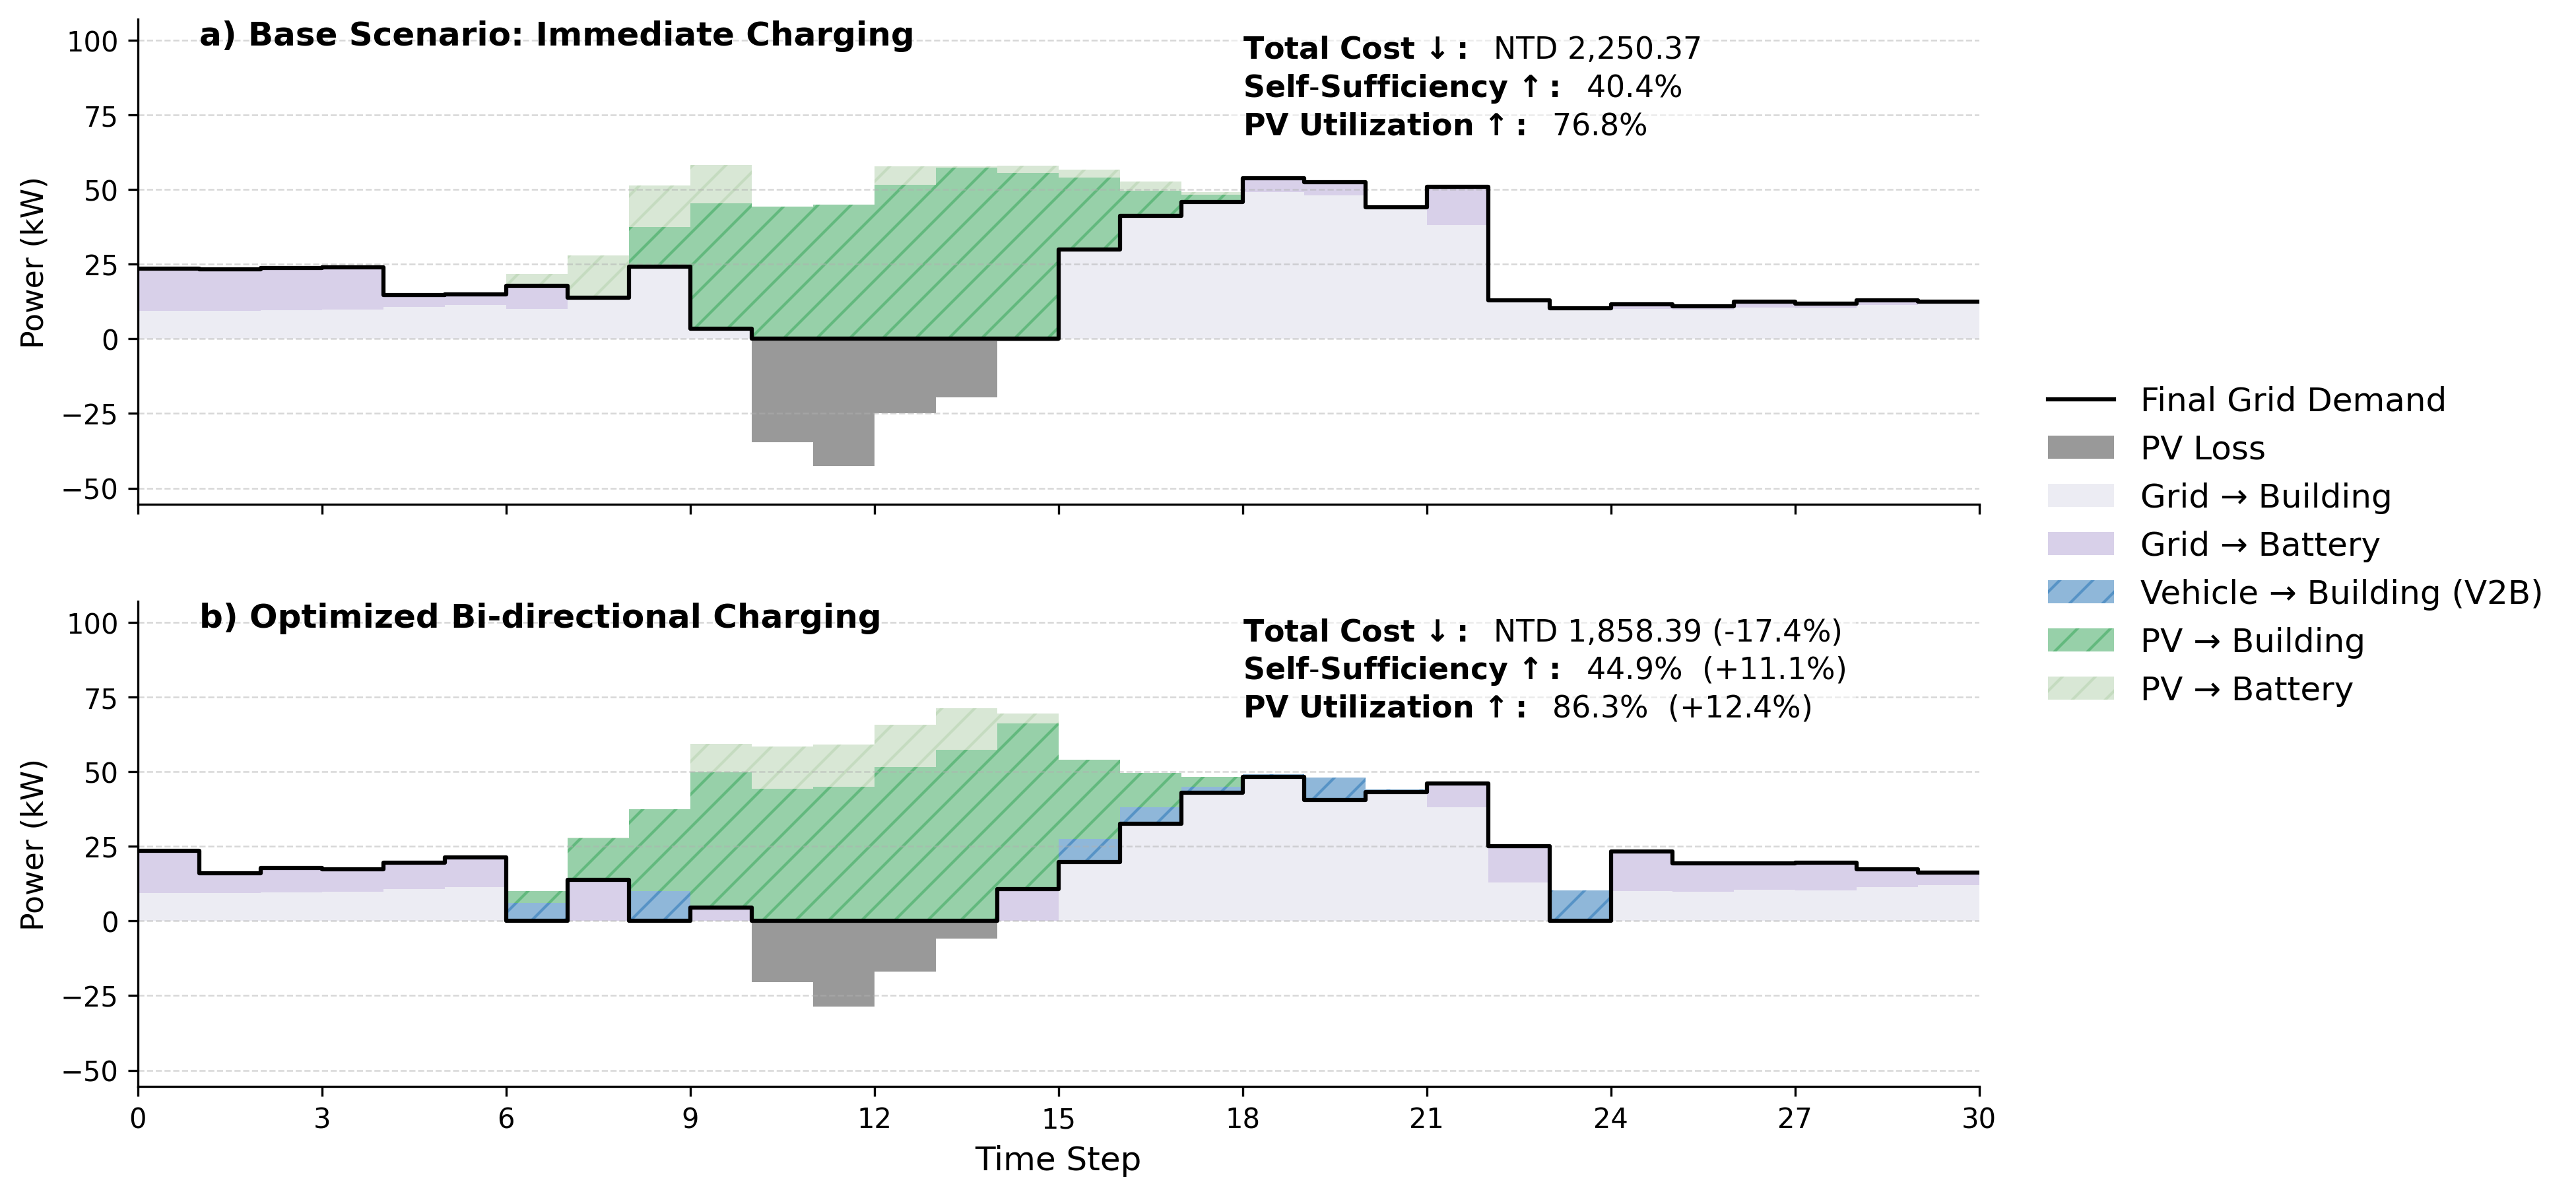

In [ ]:
from matplotlib import pyplot as plt
import numpy as np, random

PROJECT_NAME = "WL30_PV500_Test"

RESULTS_PATH_OPT = f"./output/{PROJECT_NAME}/optimization" 
RESULTS_PATH_IMM = f"./output/{PROJECT_NAME}/immediate_charging"

# Load Optimization Results
G2B_OPT = np.load(RESULTS_PATH_OPT + '/G2B.npy')
G2V_OPT = np.load(RESULTS_PATH_OPT + '/G2V.npy')
P2B_OPT = np.load(RESULTS_PATH_OPT + '/P2B.npy')
P2V_OPT = np.load(RESULTS_PATH_OPT + '/P2V.npy')
V2B_OPT = np.load(RESULTS_PATH_OPT + '/V2B.npy')
SOC_OPT = np.load(RESULTS_PATH_OPT + '/SOC.npy')
initial_demand_opt = np.load(RESULTS_PATH_OPT + '/initial_demand.npy')
grid_demand_opt = np.load(RESULTS_PATH_OPT + '/grid_demand.npy')
charging_demand_opt = np.load(RESULTS_PATH_OPT + '/charging_demand.npy')
pv_loss_opt = np.load(RESULTS_PATH_OPT + '/pv_loss.npy')
unmet_opt = np.load(RESULTS_PATH_OPT + '/unmet.npy')
total_cost_opt = np.load(RESULTS_PATH_OPT + '/total_cost.npy')
self_sufficiency_opt = np.load(RESULTS_PATH_OPT + '/self_sufficiency.npy')
pv_utilization_opt = np.load(RESULTS_PATH_OPT + '/pv_utilization.npy')
objective_value_opt = np.load(RESULTS_PATH_OPT + '/objective_value.npy')
optimization_time_s_opt = np.load(RESULTS_PATH_OPT + '/optimization_time_s.npy')
mip_gap_percent_opt = np.load(RESULTS_PATH_OPT + '/mip_gap_percent.npy')

# Load Immediate Results
G2B_IMM = np.load(RESULTS_PATH_IMM + '/G2B.npy')
G2V_IMM = np.load(RESULTS_PATH_IMM + '/G2V.npy')
P2B_IMM = np.load(RESULTS_PATH_IMM + '/P2B.npy')
P2V_IMM = np.load(RESULTS_PATH_IMM + '/P2V.npy')
V2B_IMM = np.load(RESULTS_PATH_IMM + '/V2B.npy')
SOC_IMM = np.load(RESULTS_PATH_IMM + '/SOC.npy')
initial_demand_imm = np.load(RESULTS_PATH_IMM + '/initial_demand.npy')
grid_demand_imm = np.load(RESULTS_PATH_IMM + '/grid_demand.npy')
charging_demand_imm = np.load(RESULTS_PATH_IMM + '/charging_demand.npy')
pv_loss_imm = np.load(RESULTS_PATH_IMM + '/pv_loss.npy')
unmet_imm = np.load(RESULTS_PATH_IMM + '/unmet.npy')
total_cost_imm = np.load(RESULTS_PATH_IMM + '/total_cost.npy')
self_sufficiency_imm = np.load(RESULTS_PATH_IMM + '/self_sufficiency.npy')
pv_utilization_imm = np.load(RESULTS_PATH_IMM + '/pv_utilization.npy')


# --- Select a random scenario ---
random_idx = random.randint(0, len(G2B_OPT) - 1)
print("Selected index:", random_idx)

# --- Helper to extend arrays by duplicating last value ---
def extend_last(arr):
    return np.append(arr, arr[-1])

# === Extract and extend all arrays ===
def prepare_arrays(base, opt):
    out = {}
    for name, arr in base.items():
        out[name + "_IMM"] = extend_last(arr[random_idx])
    for name, arr in opt.items():
        out[name + "_OPT"] = extend_last(arr[random_idx])
    return out

arrays = prepare_arrays(
    base={
        "G2B": G2B_IMM,
        "G2V": np.array([np.sum(g[:, ~np.isnan(g).any(axis=0)], axis=1) for g in G2V_IMM]),
        "P2B": P2B_IMM,
        "P2V": np.array([np.sum(p[:, ~np.isnan(p).any(axis=0)], axis=1) for p in P2V_IMM]),
        "V2B": np.array([np.sum(v[:, ~np.isnan(v).any(axis=0)], axis=1) for v in V2B_IMM]),
        "LOSS": pv_loss_imm,
        "GRID": grid_demand_imm
    },
    opt={
        "G2B": G2B_OPT,
        "G2V": np.array([np.sum(g[:, ~np.isnan(g).any(axis=0)], axis=1) for g in G2V_OPT]),
        "P2B": P2B_OPT,
        "P2V": np.array([np.sum(p[:, ~np.isnan(p).any(axis=0)], axis=1) for p in P2V_OPT]),
        "V2B": np.array([np.sum(v[:, ~np.isnan(v).any(axis=0)], axis=1) for v in V2B_OPT]),
        "LOSS": pv_loss_opt,
        "GRID": grid_demand_opt
    }
)

total_cost_opt_selected = float(total_cost_opt[random_idx])
total_cost_imm_selected = float(total_cost_imm[random_idx])
self_sufficiency_opt_selected = float(self_sufficiency_opt[random_idx])
self_sufficiency_imm_selected = float(self_sufficiency_imm[random_idx])
pv_utilization_opt_selected   = float(pv_utilization_opt[random_idx])
pv_utilization_imm_selected   = float(pv_utilization_imm[random_idx])

# --- Compute percentage changes ---
cost_reduction = (total_cost_opt_selected - total_cost_imm_selected) / total_cost_imm_selected * 100
self_suff_improvement = (self_sufficiency_opt_selected - self_sufficiency_imm_selected) / self_sufficiency_imm_selected * 100
pv_util_improvement   = (pv_utilization_opt_selected - pv_utilization_imm_selected) / pv_utilization_imm_selected * 100

# --- Extended time axis ---
time_steps = np.arange(len(arrays["G2B_IMM"]) - 1)
time_steps_ext = np.append(time_steps, time_steps[-1] + 1)

# --- Color and label setup ---
colors = ["#e8e8f0", "#b2a2d4", "#2171b5", "#31a354", "#b3d1ac", "#808080"]
hatches = [None, None, "//", "//", "//", None]
labels = [
    "Grid → Building",
    "Grid → Battery",
    "Vehicle → Building (V2B)",
    "PV → Building",
    "PV → Battery",
    "PV Loss"
]

scenarios = [
    ("a) Base Scenario: Immediate Charging",
     arrays["G2B_IMM"], arrays["G2V_IMM"], arrays["V2B_IMM"],
     arrays["P2B_IMM"], arrays["P2V_IMM"], arrays["LOSS_IMM"], arrays["GRID_IMM"]),
    ("b) Optimized Bi-directional Charging",
     arrays["G2B_OPT"], arrays["G2V_OPT"], arrays["V2B_OPT"],
     arrays["P2B_OPT"], arrays["P2V_OPT"], arrays["LOSS_OPT"], arrays["GRID_OPT"])
]

# --- Figure setup ---
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 7), dpi=300, sharex=True)

ylim = (
    max(max(arrays["LOSS_IMM"]), max(arrays["LOSS_OPT"])) * -1.3,
    max(
        max(arrays["G2B_IMM"] + arrays["G2V_IMM"] + arrays["V2B_IMM"] + arrays["P2V_IMM"] + arrays["P2B_IMM"]),
        max(arrays["G2B_OPT"] + arrays["G2V_OPT"] + arrays["V2B_OPT"] + arrays["P2V_OPT"] + arrays["P2B_OPT"])
    ) * 1.5
)

# === Plot each scenario ===
for ax, (title, G2B, G2V, V2B, P2B, P2V, loss, grid_demand) in zip(axes, scenarios):
    cumulative = np.zeros_like(time_steps_ext, dtype=float)

    # --- Step line for grid demand ---
    ax.step(time_steps_ext, grid_demand, where='post', color='black', linewidth=1.5, label='Final Grid Demand')

    # --- PV Loss (below zero) ---
    ax.fill_between(time_steps_ext, cumulative, cumulative - loss,
                    step='post', color=colors[5], alpha=0.8, label=labels[5], linewidth=0)

    # --- Grid → Building ---
    ax.fill_between(time_steps_ext, cumulative, cumulative + G2B,
                    step='post', color=colors[0], alpha=0.8, label=labels[0], linewidth=0)
    cumulative += G2B

    # --- Grid → Battery ---
    ax.fill_between(time_steps_ext, cumulative, cumulative + G2V,
                    step='post', color=colors[1], alpha=0.5, label=labels[1], linewidth=0)
    cumulative += G2V

    # --- Vehicle → Building (discharge) ---
    ax.fill_between(time_steps_ext, grid_demand, grid_demand + V2B,
                    step='post', color=colors[2], alpha=0.5, hatch=hatches[2],
                    label=labels[2], linewidth=0)

    # --- PV → Building ---
    ax.fill_between(time_steps_ext,
                    grid_demand + V2B,
                    grid_demand + V2B + P2B,
                    step='post', color=colors[3], alpha=0.5, hatch=hatches[3],
                    label=labels[3], linewidth=0)

    # --- PV → Battery ---
    ax.fill_between(time_steps_ext,
                    grid_demand + V2B + P2B,
                    grid_demand + V2B + P2B + P2V,
                    step='post', color=colors[4], alpha=0.5, hatch=hatches[4],
                    label=labels[4], linewidth=0)

    # --- Axes styling ---
    ax.text(1, ylim[1] * 0.92, title, fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Power (kW)', fontsize=11)
    ax.set_ylim(ylim)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 30)
    ax.set_xticks(np.arange(0, 31, 3))
    
    if "Immediate" in title:
        ax.text(
            18, ylim[1] * 0.95,
            (
                r"$\mathbf{Total\ Cost\ ↓:}$"      + f"  NTD {total_cost_imm_selected:,.2f}\n"
                r"$\mathbf{Self\text{-}Sufficiency\ ↑:}$" + f"  {self_sufficiency_imm_selected*100:.1f}%\n"
                r"$\mathbf{PV\ Utilization\ ↑:}$"  + f"  {pv_utilization_imm_selected*100:.1f}%"
            ),
            fontsize=11,
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'),
            linespacing=1.3
        )
    else:
        ax.text(
            18, ylim[1] * 0.95,
            (
                r"$\mathbf{Total\ Cost\ ↓:}$"      + f"  NTD {total_cost_opt_selected:,.2f} ({cost_reduction:+.1f}%)\n"
                r"$\mathbf{Self\text{-}Sufficiency\ ↑:}$" + f"  {self_sufficiency_opt_selected*100:.1f}%  ({self_suff_improvement:+.1f}%)\n"
                r"$\mathbf{PV\ Utilization\ ↑:}$"  + f"  {pv_utilization_opt_selected*100:.1f}%  ({pv_util_improvement:+.1f}%)"
            ),
            fontsize=11,
            ha='left', va='top',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'),
            linespacing=1.3
        )

# Shared x-axis label
axes[-1].set_xlabel('Time Step', fontsize=12)

# Legend
handles, labels_all = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels_all, loc='center right', ncol=1, frameon=False,
           fontsize=12, bbox_to_anchor=(1.15, 0.5))

plt.show()


In [ ]:
random.seed(25)

random_idx = random.randint(0, len(G2B_OPT) - 1)
random_idx

# =============================
# 1. Base Data Extraction
# =============================
selected_charging = charging_demands[random_idx]
selected_grid_final = final_grid_demands[random_idx]

selected_charging_immediate = charging_demands_immediate[random_idx]
selected_grid_immediate = final_grid_demands_immediate[random_idx]

selected_pv = pv_generations_immediate[random_idx]
selected_building = building_energy_demands_immediate[random_idx]

# =============================
# 2. Separate Positive/Negative Charging
# =============================
discharging_demands = np.array([v if v < 0 else 0 for v in selected_charging])
charging_only_demands = np.array([v if v > 0 else 0 for v in selected_charging])

discharging_demands_immediate = np.array([v if v < 0 else 0 for v in selected_charging_immediate])
charging_only_demands_immediate = np.array([v if v > 0 else 0 for v in selected_charging_immediate])

time_steps = np.arange(len(selected_charging))

# =============================
# 3. Energy Flow Computation Function
# =============================
def compute_flows(selected_grid, charging_only, discharging, pv, building):
    """Compute energy flow components for one scenario."""
    vehicle_to_building = -discharging                            # 1. Discharging to building

    grid_to_battery = np.maximum(selected_grid - building, 0)      # 4. Grid → battery if > building
    grid_to_building = np.maximum(selected_grid - grid_to_battery, 0)   # 5. Remaining grid → building
    grid_to_building = np.maximum(grid_to_building, 0)             # avoid negatives
    
    pv_to_building = np.maximum(building - grid_to_building, 0)             # 3. Remaining PV → building
    pv_to_battery = np.maximum(pv - pv_to_building, 0)                  # 2. PV → battery first

    return {
        "vehicle_to_building": vehicle_to_building,
        "pv_to_battery": pv_to_battery,
        "pv_to_building": pv_to_building,
        "grid_to_battery": grid_to_battery,
        "grid_to_building": grid_to_building
    }

flows_final = compute_flows(selected_grid_final, charging_only_demands, discharging_demands, selected_pv, selected_building)
flows_immediate = compute_flows(selected_grid_immediate, charging_only_demands_immediate, discharging_demands_immediate, selected_pv, selected_building)

# =============================
# 4. Plot Configuration
# =============================
labels = [
    "Grid → Building",
    "Grid → Battery",
    "Vehicle → Building (V2B)",
    "PV → Building",
    "PV → Battery"
]
colors = ["#bcbddc", "#756bb1", "#3182bd", "#31a354", "#a1d99b"]  # lavender-gray, medium purple, blue, green, light green
#     "grid_to_building": "#bcbddc",   # lavender-gray
#     "grid_to_battery":  "#756bb1",   # medium purple
#     "vehicle_to_building": "#3182bd",# blue
#     "pv_to_building":    "#31a354",  # green
#     "pv_to_battery":     "#a1d99b"   # light green
# }

colors = [
    "#e8e8f0",  # 0. Grid → Building  (very light lavender gray)
    "#b2a2d4",  # 1. Grid → Battery   (muted violet)
    "#2171b5",   # 4. Vehicle → Building (Discharging) (strong blue)
    "#31a354",  # 3. PV → Building    (medium green)
    "#b3d1ac"  # 2. PV → Battery     (pale green)
]

hatches = [None, None, "//", "//", "//"]

scenarios = [
    ("a) Base Scenario: Immediate Charging", selected_grid_immediate, flows_immediate),
    ("b) Optimized Bi-directional Charging", selected_grid_final, flows_final)
]

# =============================
# 5. Plotting
# =============================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7), dpi=300, sharex=True)

ylim = (0,max(max(selected_grid_immediate + flows_immediate["vehicle_to_building"] + flows_immediate["pv_to_building"] + flows_immediate["pv_to_battery"]) * 1.2, 
              max(selected_grid_final + flows_final["vehicle_to_building"] + flows_final["pv_to_building"] + flows_final["pv_to_battery"]) * 1.2))

for ax, (title, grid_demand, flow) in zip(axes, scenarios):

    # bottom cumulative variable
    cumulative = np.zeros_like(time_steps, dtype=float)
    
    # --- Plot total grid demand line ---
    ax.plot(grid_demand, color='black', linewidth=1.5, label='Final Grid Demand')
    
    # --- Stack 1: Grid → Building ---
    ax.fill_between(time_steps, cumulative, cumulative + flow["grid_to_building"],
                    color=colors[0], alpha=0.8, label=labels[0], linewidth=0)
    cumulative += flow["grid_to_building"]

    # --- Stack 2: Grid → Battery ---
    ax.fill_between(time_steps, cumulative, cumulative + flow["grid_to_battery"],
                    color=colors[1], alpha=0.5, label=labels[1], linewidth=0)
    cumulative += flow["grid_to_battery"]

    # --- Stack 3: Vehicle → Building (Discharging) ---
    ax.fill_between(time_steps, grid_demand, grid_demand + flow["vehicle_to_building"],
                    color=colors[2], alpha=0.5, hatch=hatches[2], label=labels[2], linewidth=0)

    # --- Stack 4: PV → Building ---
    ax.fill_between(time_steps,
                    grid_demand + flow["vehicle_to_building"],
                    grid_demand + flow["vehicle_to_building"] + flow["pv_to_building"],
                    color=colors[3], alpha=0.5, hatch=hatches[3], label=labels[3], linewidth=0)

    # --- Stack 5: PV → Battery ---
    ax.fill_between(time_steps,
                    grid_demand + flow["vehicle_to_building"] + flow["pv_to_building"],
                    grid_demand + flow["vehicle_to_building"] + flow["pv_to_building"] + flow["pv_to_battery"],
                    color=colors[4], alpha=0.5, hatch=hatches[4], label=labels[4], linewidth=0)
    
    # --- Axes styling ---
    ax.text(1,ylim[1]*0.92,title, fontsize=12,fontweight = 'bold')
    ax.set_ylabel('Power (kW)', fontsize=11)
    ax.set_ylim(ylim)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 48)
    ax.set_xticks(np.arange(0, 49, 6))

# Shared bottom x-axis label
axes[-1].set_xlabel('Time Step', fontsize=12)

# Shared legend
handles, labels_all = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels_all, loc='upper right', ncol=2, frameon=False, fontsize=10, bbox_to_anchor=(0.9, 0.83))

# plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

In [ ]:
print(random_idx)
immediate_cost = total_costs_immediate[random_idx]
v2b_cost =(4931.03057)

immediate_utilization = pv_utilizations_immediate[random_idx]
v2b_utilization = pv_utilizations[random_idx]

immediate_self_sufficiency = self_sufficiencies_immediate[random_idx]
v2b_self_sufficiency = self_sufficiencies[random_idx]

In [ ]:
# === 1. Select Scenario ===
print(f"Scenario index: {random_idx}")

# === 2. Extract Indicator Values ===
immediate_cost = total_costs_immediate[random_idx]
v2b_cost = total_costs[random_idx]

immediate_utilization = pv_utilizations_immediate[random_idx]
v2b_utilization = pv_utilizations[random_idx]

immediate_self_sufficiency = self_sufficiencies_immediate[random_idx]
v2b_self_sufficiency = self_sufficiencies[random_idx]

immediate_final_grid = np.sum(final_grid_demands_immediate[random_idx])
v2b_final_grid = np.sum(final_grid_demands[random_idx])

# === 3. Compute Percentage Reductions / Improvements ===
def percent_change(new, old):
    """Return percentage change from old → new (positive = reduction)."""
    return ((old - new) / old) * 100 if old != 0 else np.nan

cost_reduction = percent_change(v2b_cost, immediate_cost)
grid_demand_reduction = percent_change(v2b_final_grid, immediate_final_grid)
pv_utilization_improvement = ((v2b_utilization - immediate_utilization) / immediate_utilization) * 100
self_sufficiency_improvement = ((v2b_self_sufficiency - immediate_self_sufficiency) / immediate_self_sufficiency) * 100

# === 4. Display Results ===
print(f"💰 Cost Reduction: {cost_reduction:.2f}%")
print(f"⚡ Grid Demand Reduction: {grid_demand_reduction:.2f}%")
print(f"🌞 PV Utilization Improvement: {pv_utilization_improvement:.2f}%")
print(f"🏠 Self-Sufficiency Improvement: {self_sufficiency_improvement:.2f}%")


In [ ]:
import numpy as np
import pandas as pd

# === 1. Select Scenario ===
print(f"Scenario index: {random_idx}")

# === 2. Extract Indicator Values ===
immediate_cost = total_costs_immediate[random_idx]
v2b_cost = 4931.03057  # or total_costs[random_idx] if available

immediate_utilization = pv_utilizations_immediate[random_idx]
v2b_utilization = pv_utilizations[random_idx]

immediate_self_sufficiency = self_sufficiencies_immediate[random_idx]
v2b_self_sufficiency = self_sufficiencies[random_idx]

immediate_final_grid = np.sum(final_grid_demands_immediate[random_idx])
v2b_final_grid = np.sum(final_grid_demands[random_idx])

# === 3. Compute Percentage Change Helper ===
def percent_change(new, old):
    """Return percentage change (positive = reduction for cost/grid, improvement for others)."""
    return ((new - old) / old) * 100 if old != 0 else np.nan

# === 4. Compute Changes ===
data = {
    "Indicator": [
        "Total Cost (TWD) ↓",
        "Grid Demand (kWh) ↓",
        "PV Utilization (%) ↑",
        "Self-Sufficiency (%) ↑"
    ],
    "Before (Immediate)": [
        immediate_cost,
        immediate_final_grid,
        immediate_utilization,
        immediate_self_sufficiency
    ],
    "After (V2B)": [
        v2b_cost,
        v2b_final_grid,
        v2b_utilization,
        v2b_self_sufficiency
    ],
}

df = pd.DataFrame(data)

# Compute percentage change (improvement or reduction)
df["Change (%)"] = [
    percent_change(v2b_cost, immediate_cost),           # cost (↓ better)
    percent_change(v2b_final_grid, immediate_final_grid), # grid demand (↓ better)
    percent_change(v2b_utilization, immediate_utilization), # PV utilization (↑ better)
    percent_change(v2b_self_sufficiency, immediate_self_sufficiency) # self-sufficiency (↑ better)
]

# Adjust direction: cost and grid demand are *reductions*
# df.loc[0:1, "Change (%)"] *= -1

# === 5. Display ===
print("\n=== Performance Comparison ===")
print(df.to_string(index=False, formatters={
    "Before (Immediate)": "{:,.2f}".format,
    "After (V2B)": "{:,.2f}".format,
    "Change (%)": "{:+.2f}%".format
}))
